<a href="https://colab.research.google.com/github/p3dr0id/minicurso-python-analise-dados/blob/main/minicurso_python_para_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introdução ao Python para Análise de Dados

Prof. Dr. Pedro Dias Pinto

CMLEM - UFOB

pedro.dias@ufob.edu.br

---



# Apresentação das bibliotecas que serão utilizadas

## Pandas

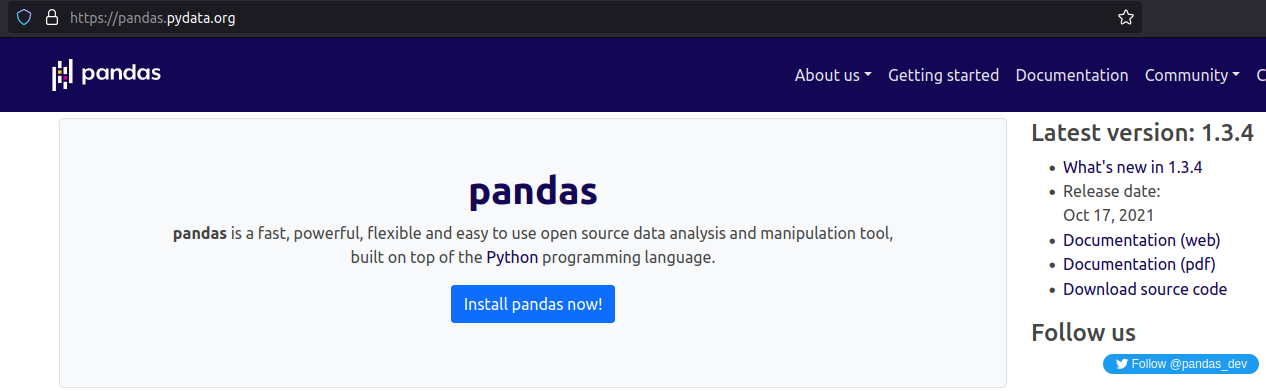

A biblioteca pandas é uma ferramenta de análise e manipulação de dados rápida e flexível. Como foi criada dentro de um contexto inicial da análise de dados financeiros, ela oferece estruturas e operações para manipular tabelas numéricas e séries temporais. A biblioteca pandas tem uma ótima integração com outras bibliotecas importantes de análise de dados em Python como NumPy, Scikit-Learn e Matplotlib.

Site: https://pandas.pydata.org/

## Numpy

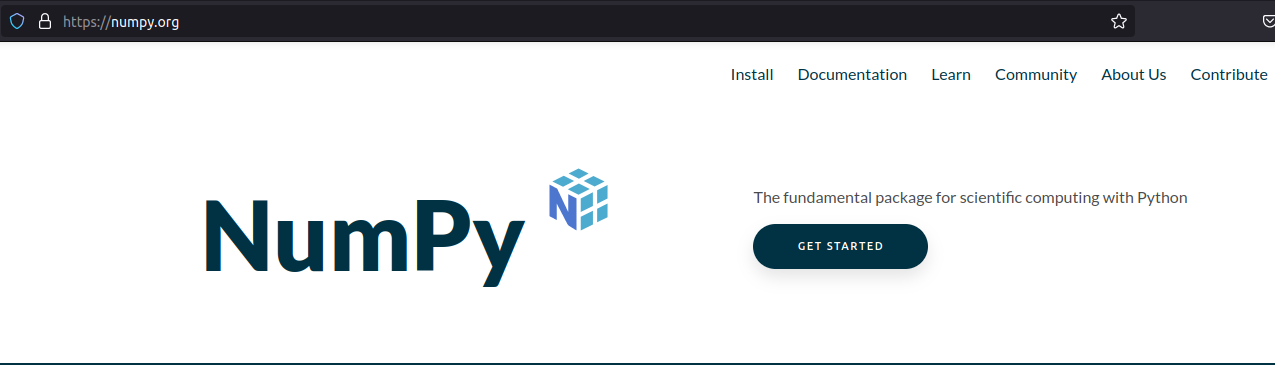

Site: https://numpy.org/

## Matplotlib

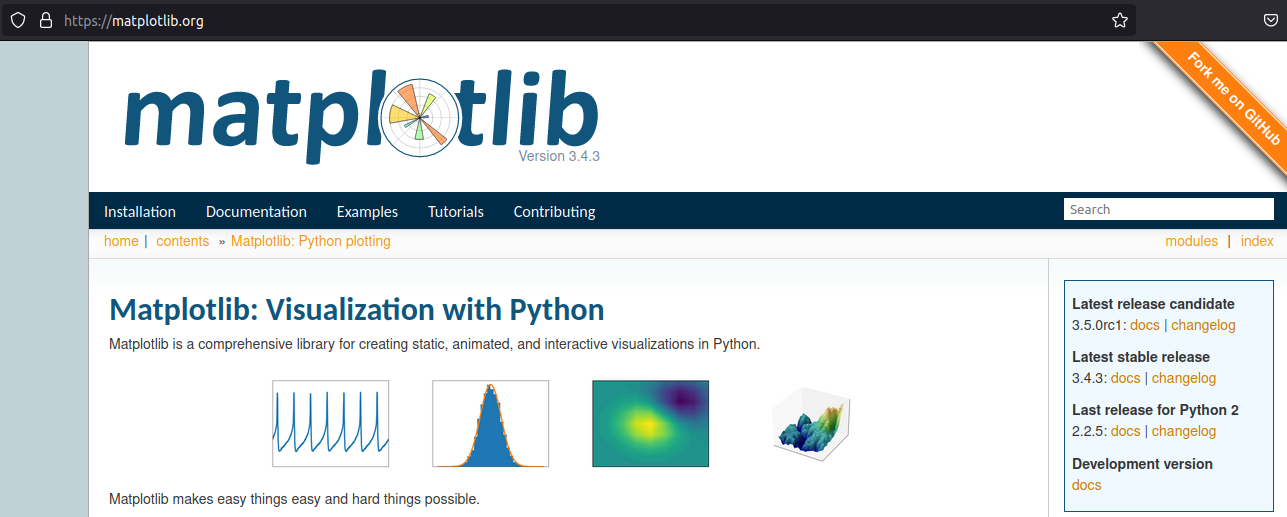

Site: https://matplotlib.org/

# Fundamentos das estruturas de dados do Pandas

## Importando bibliotecas Pandas e Numpy

In [ ]:
import pandas as pd
import numpy as np

## Series

A Series é uma estrutura de dados unidimensional que engloba itens com um mesmo tipo de dado. 

É possível criar uma Series a partir de qualquer estrutura sequencial de dados (listas, tuplas ou um array do numpy)

In [ ]:
# Criando uma Series a partir de uma lista
lista = [2, 4, 6]
pd.Series(lista)

0    2
1    4
2    6
dtype: int64

In [ ]:
# Criando uma Series a partir de uma tupla
tupla = (2, 4, 6)
pd.Series(tupla)

0    2
1    4
2    6
dtype: int64

In [ ]:
# Criando uma Series a partir de um dicionário
array_numpy = np.array([2, 4, 6])
pd.Series(array_numpy)

0    2
1    4
2    6
dtype: int64

In [ ]:
# Criando uma Series passando uma tupla ao construtor Series()
inflacao = pd.Series((2.2, 3.4, 2.8, 1.6, 2.3, 2.7, 3.4, 3.2, 2.8, 3.8,-0.4, 1.6, 3.2, 2.1, 1.5, 1.5))
inflacao

0     2.2
1     3.4
2     2.8
3     1.6
4     2.3
5     2.7
6     3.4
7     3.2
8     2.8
9     3.8
10   -0.4
11    1.6
12    3.2
13    2.1
14    1.5
15    1.5
dtype: float64

O atributo `values` de uma Series tem a lista de todos os valores armazenados na série; o atributo `index` refere ao indice da Series (`Index` é outro tipo de dados do pandas); e o atributo `index.values` refere ao array de todos os valores do indice.

In [ ]:
# Retorna uma array numpy com os valores de inflacao
inflacao.values

array([ 2.2,  3.4,  2.8,  1.6,  2.3,  2.7,  3.4,  3.2,  2.8,  3.8, -0.4,
        1.6,  3.2,  2.1,  1.5,  1.5])

In [ ]:
inflacao.index

RangeIndex(start=0, stop=16, step=1)

In [ ]:
# Retorna um array numpy com os valores do indice
inflacao.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Se quisermos alterar o último valor da série para corrigir um erro, podemos fazer


In [ ]:
inflacao.values[15]

1.5

In [ ]:
inflacao.values[-1]

1.5

In [ ]:
inflacao.values[-1] = 1.6
inflacao

0     2.2
1     3.4
2     2.8
3     1.6
4     2.3
5     2.7
6     3.4
7     3.2
8     2.8
9     3.8
10   -0.4
11    1.6
12    3.2
13    2.1
14    1.5
15    1.6
dtype: float64

Até então isso é muito parecido com um array do numpy. A diferença é que a Series do pandas é bem mais flexível com os índices que podem ser utilizados

In [ ]:
np.arange(1999,2015)

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014])

In [ ]:
# Atribuindo os anos associados aos valores de inflação como indices
inflacao.index = pd.Index(np.arange(1999,2015))
inflacao

1999    2.2
2000    3.4
2001    2.8
2002    1.6
2003    2.3
2004    2.7
2005    3.4
2006    3.2
2007    2.8
2008    3.8
2009   -0.4
2010    1.6
2011    3.2
2012    2.1
2013    1.5
2014    1.6
dtype: float64

Os valores e indices de uma Series podem ter nomes. Os nomes são essencialmente uma forma de documentação para nos lembrar (ou futuros utilizadores dos dados) sobre a natureza a que se tratam.

In [ ]:
inflacao.index.name = 'ano'
inflacao.name = '%'

In [ ]:
inflacao

ano
1999    2.2
2000    3.4
2001    2.8
2002    1.6
2003    2.3
2004    2.7
2005    3.4
2006    3.2
2007    2.8
2008    3.8
2009   -0.4
2010    1.6
2011    3.2
2012    2.1
2013    1.5
2014    1.6
Name: %, dtype: float64

Podemos inserir novas informações de dados na Series da forma

In [ ]:
inflacao['2015'] = 1.8
inflacao['2016'] = np.nan # dado não informado
inflacao['2017'] = 1.6
inflacao

ano
1999    2.2
2000    3.4
2001    2.8
2002    1.6
2003    2.3
2004    2.7
2005    3.4
2006    3.2
2007    2.8
2008    3.8
2009   -0.4
2010    1.6
2011    3.2
2012    2.1
2013    1.5
2014    1.6
2015    1.8
2016    NaN
2017    1.6
Name: %, dtype: float64

## DataFrame

Um dataframe é uma tabela com marcações de linhas e colunas. É possível construir um dataframe de diversas maneiras como por exemplo um array bidimensional do numpy, uma lista de listas ou de tuplas ou um dicionário. No caso do dicionário, as chaves servem como nomes de colunas e os valores são os dados dispostos nas linhas.

In [ ]:
data = {'State': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'Year': [2000, 2001, 2002, 2001, 2002, 2003], 
        'Pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,State,Year,Pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


Se você especificar uma sequência de colunas, as colunas do DataFrame serão organizadas nesta ordem:

In [ ]:
pd.DataFrame(data, columns=['Year', 'State', 'Pop'])

,Year,State,Pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


Se você passar uma coluna que não esteja contida no dicionário, ela aparecerá com valores ausentes no resultado:

In [ ]:
pd.DataFrame(data, columns=['Year', 'State', 'Pop', 'Debt'])

,Year,State,Pop,Debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


Assim como fizemos na Series, o DataFrame também permite a reindexação

In [ ]:
frame2 = pd.DataFrame(data, columns=['Year', 'State', 'Pop', 'Debt'], index=['one', 'two', 'three', 'four', 'five', 'six'])
frame2

,Year,State,Pop,Debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


Com o método `.rename()` podemos renomear as colunas passando um dicionário para o parâmetro `columns` da forma:

In [ ]:
# O parâmetro inplace=True permite que seja sobrescrito o dataframe para que seja implementada a mudança
frame2.rename(columns={'Year':'year', 'State':'state', 'Pop':'pop', 'Debt': 'debt'}, inplace=True)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


Uma coluna em um DataFrame pode ser obtida como uma Series, seja usando uma notação do tipo dicionário ou por meio de atributo:

In [ ]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [ ]:
# Mesmo resultado anterior (mas nesse caso só funciona quando o nome da coluna for um nome de variável válido em Python)
frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

As linhas também podem ser obtidas com base na posição ou no nome, com o atributos especiais `iloc` e `.loc`, respectivamente

In [ ]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [ ]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [ ]:
frame2.iloc[2]

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

As colunas podem ser modificadas por atribuição. Por exemplo, a coluna vazia 'debt' poderia receber um valor escalar ou um array de valores:

In [ ]:
frame2['debt'] = 17.3
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,17.3
two,2001,Ohio,1.7,17.3
three,2002,Ohio,3.6,17.3
four,2001,Nevada,2.4,17.3
five,2002,Nevada,2.9,17.3
six,2003,Nevada,3.2,17.3


In [ ]:
np.arange(6.0)

array([0., 1., 2., 3., 4., 5.])

In [ ]:
frame2['debt'] = np.arange(6.0)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


### Seleção e filtragem

A indexação em um DataFrame serve para obter uma ou mais colunas, seja com um único valor ou com uma sequência:

In [ ]:
frame2[['state']]

,state
one,Ohio
two,Ohio
three,Ohio
four,Nevada
five,Nevada
six,Nevada


In [ ]:
frame2[['state', 'debt']]

,state,debt
one,Ohio,0.0
two,Ohio,1.0
three,Ohio,2.0
four,Nevada,3.0
five,Nevada,4.0
six,Nevada,5.0


In [ ]:
df_temp = frame2.loc[:'three','year':'pop']

In [ ]:
df_temp

,year,state,pop
one,2000,Ohio,1.5
two,2001,Ohio,1.7
three,2002,Ohio,3.6


In [ ]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [ ]:
frame2[frame2['year'] > 2001]

,year,state,pop,debt
three,2002,Ohio,3.6,2.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


# Técnicas de limpeza e preparação dos dados

"Durante a análise e a modelagem dos dados, um período significativo de tempo é gasto em sua preparação: carga, limpeza, transformação e reorganização. Sabe-se que essas tarefas em geral ocupam 80% ou mais do tempo de um analista."  Wes Mckinney

## Tratando dados ausentes

### Representação

Para dados numéricos ausentes, o pandas utiliza o valor de ponto flutuante NaN (Not a Number) para representá-los.

In [ ]:
nomes = pd.Series(['Aurélio', 'Cesar', 'Nero', np.nan, 'Julio'])
nomes

0    Aurélio
1      Cesar
2       Nero
3        NaN
4      Julio
dtype: object

### Filtrando dados ausentes

Para filtrar dados ausentes pode-se utilizar o método `.isnull()` que retorna valores booleanos informando quais valores são ausentes

In [ ]:
nomes.isnull()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [ ]:
dados = pd.Series([1, np.nan, 3.5, np.nan, 7])
dados

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

Já o método `.dropna()` retorna a Series filtrada sem os valores ausentes

In [ ]:
dados.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
# O resultado anterior pode ser obtido por indexação booleana usando o método inverso de .isnull()
dados[dados.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

Com dataframes a situação é um pouco mais complexa. Talvez queiramos apenas descartar linhas ou colunas específicas com dados faltantes. Por padrão o método `.dropna()` descarta todas as linhas e colunas com dados faltantes

In [ ]:
dados = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan], [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])
dados

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
dados.dropna()

,0,1,2
0,1.0,6.5,3.0


In [ ]:
# Passar how='all' como argumento descartará apenas as linhas que contenham somente NaNs:
dados.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
# Para descartar colunas do mesmo modo, passe axis=1:
dados['3'] = np.nan
dados

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
dados.dropna(how='all', axis=1)

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


### Preenchendo dados ausentes

Em vez de filtrar dados ausentes (e possivelmente descartar outros dados junto com esses), você poderá preencher as "lacunas" de várias maneiras. Na maioria dos casos, o método `.fillna()` será a função que representa a força de trabalho
a ser utilizada.

In [ ]:
np.random.randn(7,3)

array([[ 0.53015489,  0.7876566 ,  0.85336604],
       [-2.06920188,  0.44957999,  1.36716079],
       [ 0.40723795,  0.32196325,  1.37127647],
       [ 1.20826179,  0.204659  ,  0.15391266],
       [-0.4006273 , -0.80285222,  0.8874099 ],
       [ 0.90255064,  0.4172658 ,  0.46313203],
       [-1.10060447, -0.17689996, -0.11740518]])

In [ ]:
df = pd.DataFrame(np.random.randn(7,3))
df

,0,1,2
0,0.120680,-0.639635,0.024294
1,0.337427,-0.964870,1.054476
2,0.305944,-2.515649,0.761889
3,-1.919453,-1.472610,0.228410
4,-0.565832,1.794509,0.326595
5,-0.694732,-0.647578,0.370643
6,-0.011019,0.985176,-1.589964


In [ ]:
# Preenchendo o dataframe com valores ausentes
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,0.120680,NaN,NaN
1,0.337427,NaN,NaN
2,0.305944,NaN,0.761889
3,-1.919453,NaN,0.228410
4,-0.565832,1.794509,0.326595
5,-0.694732,-0.647578,0.370643
6,-0.011019,0.985176,-1.589964


Chamar `.fillna(valor)` com um valor no argumento substitui dados ausentes pelo valor que foi passado:

In [ ]:
df.fillna(0)

,0,1,2
0,0.120680,0.000000,0.000000
1,0.337427,0.000000,0.000000
2,0.305944,0.000000,0.761889
3,-1.919453,0.000000,0.228410
4,-0.565832,1.794509,0.326595
5,-0.694732,-0.647578,0.370643
6,-0.011019,0.985176,-1.589964


Ao chamar `.fillna()` com um dicionário, podemos usar um valor de preenchimento diferente para cada coluna

In [ ]:
df

,0,1,2
0,0.120680,NaN,NaN
1,0.337427,NaN,NaN
2,0.305944,NaN,0.761889
3,-1.919453,NaN,0.228410
4,-0.565832,1.794509,0.326595
5,-0.694732,-0.647578,0.370643
6,-0.011019,0.985176,-1.589964


In [ ]:
df.fillna({1:0.5, 2:-1})

,0,1,2
0,0.120680,0.500000,-1.000000
1,0.337427,0.500000,-1.000000
2,0.305944,0.500000,0.761889
3,-1.919453,0.500000,0.228410
4,-0.565832,1.794509,0.326595
5,-0.694732,-0.647578,0.370643
6,-0.011019,0.985176,-1.589964


## Transformação de dados

### Removendo duplicatas

Linhas duplicadas podem ser encontradas em um DataFrame por diversos motivos.

In [ ]:
data = pd.DataFrame({'fruta':['banana', 'maçã', 'uva', 'uva', 'maçã'], 'quantidade':[3, 5, 2, 2, 5]})
data

,fruta,quantidade
0,banana,3
1,maçã,5
2,uva,2
3,uva,2
4,maçã,5


O método `.duplicated()` devolve uma Series booleana informando se cada linha é uma duplicata (foi observada em uma linha anterior) ou não:

In [ ]:
data.duplicated()

0    False
1    False
2    False
3     True
4     True
dtype: bool

O método `.drop_duplicates()` retorna um DataFrame removendo as duplicatas

In [ ]:
data.drop_duplicates()

,fruta,quantidade
0,banana,3
1,maçã,5
2,uva,2


### Substituindo valores

Preencher dados ausentes com o método `fillna()` é um caso especial da substituição mais genérica de valores. Para situações mais gerais onde queremos substituir um dado conjunto de valores por outro, podemos utilizar o método `.replace()`

In [ ]:
# Considere a série de idades
idades = pd.Series([1, 10, 30, 45, 60, 23, 29, 44, 500, 67])
idades

0      1
1     10
2     30
3     45
4     60
5     23
6     29
7     44
8    500
9     67
dtype: int64

In [ ]:
# Você sabe que a pessoa de indice 8 tem 50 anos e quer corrigir o erro de digitação utilizando o método .replace()
idades.replace(500, 50)

0     1
1    10
2    30
3    45
4    60
5    23
6    29
7    44
8    50
9    67
dtype: int64

In [ ]:
# Para corrigir mais de um valor, pode-se utilizar um dicionário como argumento no replace
idades.replace({500: 50, 1: 5})

0     5
1    10
2    30
3    45
4    60
5    23
6    29
7    44
8    50
9    67
dtype: int64

In [ ]:
# Utilizando um DataFrame anterior
data = pd.DataFrame({'fruta':['banana', 'maçã', 'uva', 'uva', 'maçã'], 'quantidade':[3, 5, 2, 2, 5]})
data

,fruta,quantidade
0,banana,3
1,maçã,5
2,uva,2
3,uva,2
4,maçã,5


In [ ]:
data.replace({'uva':'caju', 5:9})

,fruta,quantidade
0,banana,3
1,maçã,9
2,caju,2
3,caju,2
4,maçã,9


# Carregando arquivos de dados para análise

## A partir do computador

In [ ]:
# Importando o módulo files ba bibliteca google.colab
from google.colab import files
files.upload()

Saving dados_clientes.csv to dados_clientes (3).csv


{'dados_clientes.csv': b'Nome,Idade,Rating,Renda\nSato,18,3.66,D\nSuzuki,20,3.51,D\nTakahashi,26,9.73,A\nTanaka,25,2.47,D\nWatanabe,26,8.07,A\nIto,25,7.25,A\nYamamoto,19,6.53,B\nNakamura,21,6.34,B\nKobayashi,22,1.68,E\nSaito,21,8.63,A\nKato,18,9.34,A\nYoshida,24,7.83,A\nYamada,20,9.14,A\nSasaki,24,7.45,A\nYamaguchi,18,7.35,A\nMatsumoto,18,1.46,E\nInoue,17,2.32,D\nKimura,28,1.29,E\nHayashi,23,2.06,D\nShimizu,28,6.15,B\nYamazaki,21,2.05,D\nNakajima,24,4.84,B\nIkeda,19,8.3,A\nAbe,17,7.5,A\nHashimoto,29,4.57,B\nYamashita,25,3.05,D\nMori,25,5.31,B\nIshikawa,21,5.86,B\nMaeda,26,3.13,D\nOgawa,28,6.07,B\nFujita,24,3.63,D\nOkada,27,5.19,B\nGoto,28,8.3,A\nHasegawa,22,8.43,A\nIshii,21,6.3,B\nMurakami,29,7.43,A\nKondo,26,2.98,D\nSakamoto,18,2.37,D\nEndo,26,3.92,D\nAoki,17,3.31,D\nFujii,22,3.21,D\nNishimura,26,7.41,A\nFukuda,20,1.2,E\nOota,20,5.69,B\nMiura,23,8.26,A\nFujiwara,27,5.12,B\nOkamoto,19,4.72,B\nMatsuda,28,9.77,A\nNakagawa,22,6.55,B\nNakano,29,8.97,A\nHarada,17,5.63,B\nOno,29,1.5,E\nTamur

In [ ]:
# Insira o caminho do arquivo a partir do google colab
df_clientes = pd.read_csv('/content/dados_clientes.csv')
df_clientes

,Nome,Idade,Rating,Renda
0,Sato,18,3.66,D
1,Suzuki,20,3.51,D
2,Takahashi,26,9.73,A
3,Tanaka,25,2.47,D
4,Watanabe,26,8.07,A
...,...,...,...,...
95,Matsuo,21,6.42,B
96,Kikuchi,18,7.91,A
97,Nomura,28,2.86,D
98,Arai,28,8.98,A


## A partir da internet

Download e pré-processamento dos dados do banco da SEI:

Site: https://infovis.sei.ba.gov.br/covid19/

Repositório principal: https://ftp.sei.ba.gov.br/covid19/

In [ ]:
# Download do arquivo de dados diretamente do site da Secretaria Estadual de Saúde do Estado da Bahia
url= 'https://ftp.sei.ba.gov.br/covid19/serie_casos_covid19_BA.csv'
df_casos_bahia = pd.read_csv(url, sep=';')
df_casos_bahia

,date,casos,casos_novos
0,06/03/2020,1,1
1,07/03/2020,2,1
2,08/03/2020,2,0
3,09/03/2020,2,0
4,10/03/2020,2,0
...,...,...,...
588,16/10/2021,1239650,357
589,17/10/2021,1239893,243
590,18/10/2021,1240271,378
591,19/10/2021,1240662,391


In [ ]:
# Download do arquivo de dados diretamente do site da Secretaria Estadual de Saúde do Estado da Bahia
url= 'https://ftp.sei.ba.gov.br/covid19/serie_covid_BA_Municipios.csv'
df_casos_bahia_mun = pd.read_csv(url, sep=';', encoding='iso-8859-1')
df_casos_bahia_mun

,DATA,CD_GEOCMU,CD_GEOCMU6DIG,NM_MUNICIP,NM_MUNICIP2,NRS,NM_RS,LONG,LAT,CASO_CONF,CASO_ACOMP,CASO_TOTAL,CURADOS,ATIVOS,OBITO_ACUM,DIAS_ULTIMO_CASO,POP_MUN,OBITO_NOVO,LETALIDADE,PREVALENCIA
0,2020-04-02,2900108,290010,ABAÍRA,Abaíra,Centro-leste,Seabra,"-41,742894","-13,296569",0,0,0,0,0,0,NaN,8710.0,0,NaN,0
1,2020-04-02,2900207,290020,ABARÉ,Abaré,Norte,Paulo Afonso,"-39,317693","-8,83354",0,0,0,0,0,0,NaN,20347.0,0,NaN,0
2,2020-04-02,2900306,290030,ACAJUTIBA,Acajutiba,Nordeste,Alagoinhas,"-38,000531","-11,663172",0,0,0,0,0,0,NaN,15187.0,0,NaN,0
3,2020-04-02,2900355,290035,ADUSTINA,Adustina,Nordeste,Ribeira do Pombal,"-38,037088","-10,562382",0,0,0,0,0,0,NaN,17126.0,0,NaN,0
4,2020-04-02,2900405,290040,ÁGUA FRIA,Água Fria,Centro-leste,Serrinha,"-38,71045","-11,823137",0,0,0,0,0,0,NaN,17033.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237568,2021-10-20,2933455,293345,WANDERLEY,Wanderley,Oeste,Barreiras,"-43,906735","-11,808922",1055,1,1056,1015,10,30,3.0,12180.0,0,"2,84","8661,74"
237569,2021-10-20,2933505,293350,WENCESLAU GUIMARÃES,Wenceslau Guimarães,Sul,Valença,"-39,619219","-13,628543",1964,0,1964,1932,2,30,2.0,20978.0,0,"1,53","9362,19"
237570,2021-10-20,2933604,293360,XIQUE-XIQUE,Xique-Xique,Centro-norte,Irecê,"-42,780133","-10,984262",3079,0,3079,2991,4,84,5.0,46523.0,0,"2,73","6618,23"
237571,2021-10-20,9999989,999998,OUTROS ESTADOS,NaN,NaN,NaN,NaN,NaN,11642,24,11666,11359,0,295,0.0,NaN,0,"2,53",NaN


# Elementos de Estatística Descritiva

## Exibindo informações sobre o dataframe

In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nome    100 non-null    object 
 1   Idade   100 non-null    int64  
 2   Rating  100 non-null    float64
 3   Renda   100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [ ]:
df_clientes.shape

(100, 4)

In [ ]:
df_clientes.head()

,Nome,Idade,Rating,Renda
0,Sato,18,3.66,D
1,Suzuki,20,3.51,D
2,Takahashi,26,9.73,A
3,Tanaka,25,2.47,D
4,Watanabe,26,8.07,A


In [ ]:
df_clientes.tail()

,Nome,Idade,Rating,Renda
95,Matsuo,21,6.42,B
96,Kikuchi,18,7.91,A
97,Nomura,28,2.86,D
98,Arai,28,8.98,A
99,Watanabe,29,4.81,B


## Medidas de tendência central

Definem valores significativos, representativos e adequados para um conjunto de dados.

### Média

A média indica o valor onde estão concentrados os dados de um conjunto de valores.

In [ ]:
df_clientes.mean()

Idade     23.4000
Rating     5.6257
dtype: float64

### Mediana e Quantil

A mediana é o valor que separa a metade superior da metade inferior de uma distribuição de dados. Em termos práticos, se o número de observações é ímpar, ela é o valor central, e se é par, ela será a média das duas observações mais centrais.

In [ ]:
df_clientes.median()

Idade     24.00
Rating     5.89
dtype: float64

O quantil pode ser compreendido como uma generalização da mediana. Ele é o valor abaixo do qual está um certo percentual dos dados.

In [ ]:
# O parâmetro q controla o percentual de divisão dos dados (por padrão q=0.5)
df_clientes.quantile()

Idade     24.00
Rating     5.89
Name: 0.5, dtype: float64

In [ ]:
# Se quisermos o quantil de 25%
df_clientes.quantile(q=0.25)

Idade     20.0000
Rating     3.4875
Name: 0.25, dtype: float64

### Moda

É o valor que mais se repete dentro de um conjunto de dados.

In [ ]:
df_clientes.mode()

,Nome,Idade,Rating,Renda
0,Watanabe,28.0,1.68,A
1,NaN,NaN,5.19,NaN
2,NaN,NaN,7.45,NaN
3,NaN,NaN,8.30,NaN
4,NaN,NaN,9.99,NaN


## Medidas de dispersão

Indicam quão espalhadas estão os dados, ou como eles variam.

### Amplitude

É a diferença entre o maior e o menor valor de um conjunto de dados.

In [ ]:
df_clientes.max()

In [ ]:
df_clientes.min()

In [ ]:
df_clientes.Idade.max()-df_clientes.Idade.min()

### Variância

Expressa quanto os dados de um cojunto estão afastados do seu valor médio.

In [ ]:
df_clientes.var()

Idade     16.343434
Rating     6.766853
dtype: float64

### Desvio padrão

Tem a mesma intenção da variância porém seu resultado pode ser expresso na mesma unidade do valor médio.

In [ ]:
df_clientes.std()

Idade     4.042701
Rating    2.601318
dtype: float64

In [ ]:
# Como o desvio padrão é a raiz quadrada da variância, podemos obter o resultado anterior fazendo
df_clientes.var()**(1/2)

Idade     4.042701
Rating    2.601318
dtype: float64

## Covariância e correlação

A covariância e correlação são úteis quando queremos saber se duas variáveis possuem alguma relação entre si dentro de um conjunto de dados.

### Covariância

É uma medida do grau de interdependência numérica entre duas variáveis. Assim, variáveis independentes têm covariância zero.

In [ ]:
df_clientes.cov()

,Idade,Rating
Idade,16.343434,-0.104424
Rating,-0.104424,6.766853


A covariância pode ser de difícil interpretação e comparação pois fornece valores em escalas que serão diferentes conforme as variáveis mudem.

### Correlação

Também indica quanto duas variáveis estão relacionadas mas tem a vantagem de ser normalizada. Seu valor sempre fica entre -1 (anti-correlação perfeita) e 1 (correlação perfeita).


Correlação |	Negativa |	Positiva
-- | -- | --
Baixa |	de -0,5 à 0 |	de 0 à 0,5
Alta |	de -1 à -0,5 |	de 0,5 à 1 

In [ ]:
df_clientes.corr()

,Idade,Rating
Idade,1.00000,-0.00993
Rating,-0.00993,1.00000


#### Teste de mudança de atributo

In [ ]:
df_clientes

Vamos criar uma função para alterar a Renda de variável categórica para numérica

In [ ]:
def renda_num(valor):
  if valor == 'E':
    return 1
  if valor == 'D':
    return 2
  if valor == 'B':
    return 3
  if valor == 'A':
    return 4

Agora vamos aplicar a função na coluna renda e criar uma nova coluna para receber a renda numérica.

In [ ]:
df_clientes['Renda_num'] = df_clientes['Renda'].apply(renda_num)
df_clientes

Calculando novamente as correlações, encontramos

In [ ]:
df_clientes.corr()

Como era de se espear, o "Rating" tem uma correlação forte com o nível de Renda

## Resumo estatístico

In [ ]:
df_clientes.describe()

In [ ]:
df_casos_bahia.describe()

In [ ]:
df_casos_bahia_mun.describe()

# Visualização de dados

## Introdução a bibioteca Matplotlib para visualização de dados

A biblioteca Matplotlib é uma das bibliotecas de visualização mais populares do Python.

In [ ]:
# Importando a biblioteca matplotlib para geração de gráficos
import matplotlib.pyplot as plt 

### Criando o primeiro plot

In [ ]:
# O comando abaixo gera um gráfico vazio, pois não foram passados dados para a função plot()
plt.plot()

Vamos criar uma série com dados aleatórios usando o numpy

In [ ]:
import numpy as np
rand = np.random.randn(50)
rand

Criando um 'passeio aleatório' a partir da soma cumulativa do array 'rand' criado anteriormente.

In [ ]:
passeio = pd.Series(rand.cumsum())
passeio

Agora sim podemos preencher a função plot para geração do gráfico:

In [ ]:
plt.plot(passeio)

Por padrão o gráfico gerado é um gráfico de linha

In [ ]:
# Alterando o tamanho da figura
plt.figure(figsize=(15,5))
plt.plot(passeio)
plt.show() # remove a mensagem de saída quando o gráfico é exibido

Se quisermos deixar a linha tracejada, pode ser feito passando o parâmetro 'k--'

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(passeio, 'k--') # linha tracejada preta
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(passeio, 'r--') # linha tracejada vermelha
plt.show()

Podemos adicionar textos especificando os eixos e um título

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(passeio, 'r--')
plt.title('Passeio aleatório')
plt.xlabel('Dia')
plt.ylabel('Posição')
plt.show()

Acrescentando marcadores para mostrar os pontos

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(passeio, 'r--', marker='o')
plt.title('Passeio aleatório')
plt.xlabel('Dia')
plt.ylabel('Posição')
plt.show()

### Criando subplots

In [ ]:
# Construindo um histograma a partir dos dados do 'passeio'
plt.hist(passeio)
plt.show()

Vamos gerar dois gráficos lado a lado utilizando a função subplots()

In [ ]:
plt.figure()
# Passando a função subplots o número de linhas e colunas de gráficos
plt.subplot(1, 2, 1) # (linha, coluna, grafico)
plt.subplot(1, 2, 2)
plt.show()

In [ ]:
plt.figure()
# Passando a função subplots o número de linhas e colunas de gráficos
plt.subplot(2, 2, 1) # (linha, coluna, grafico)
plt.subplot(2, 2, 2)
plt.subplot(2, 2, 3)
plt.subplot(2, 2, 4)
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1) # O terceiro parâmetro especifica o gráfico que vai ser inserido

plt.plot(passeio, 'r--', marker='o')
plt.title('Passeio aleatório')
plt.xlabel('Dia')
plt.ylabel('Posição')

plt.subplot(1, 2 , 2) # O terceiro parâmetro especifica o gráfico que vai ser inserido

plt.hist(passeio)
plt.title('Histograma')
plt.xlabel('Posição')
plt.ylabel('Frequência')
plt.show()

## Dados de Covid na Bahia

In [ ]:
df_casos_bahia.head()

In [ ]:
serie = df_casos_bahia.set_index('date')
serie.index = pd.to_datetime(serie.index, format='%d/%m/%Y')
serie

In [ ]:
serie.plot(kind='line', figsize=(12,8))

In [ ]:
serie.plot(kind='line', figsize=(12,10), subplots=True)

In [ ]:
serie.plot(kind='line', figsize=(12,10), subplots=True, grid=True)

In [ ]:
serie['casos_novos'].plot(kind='line', figsize=(12,8), grid=True)

In [ ]:
serie.plot(kind='line', figsize=(12,8),logy=True)

## Dados de clientes

### Gráficos de dispersão

In [ ]:
df_clientes.corr()

In [ ]:
df_clientes.plot(kind='scatter', x='Idade', y='Rating', figsize=(12,8))

In [ ]:
df_clientes.plot(kind='scatter', x='Renda_num', y='Rating', figsize=(12,8))

In [ ]:
df_clientes.corr(method='spearman')

### Histogramas

In [ ]:
df_clientes.plot(kind='hist', figsize=(12,8))

In [ ]:
df_clientes.plot(kind='hist', alpha=0.5, figsize=(12,8))

In [ ]:
df_clientes.plot(kind='hist', alpha=0.5, bins=20, figsize=(12,8))

In [ ]:
df_clientes['Idade'].plot(kind='hist', bins=20, figsize=(12,8))

In [ ]:
df_clientes.plot(kind = 'box', figsize=(12,8))

In [ ]:
df_clientes['Idade'].plot(kind = 'box', figsize=(12,8))

In [ ]:
df_clientes['Idade'].describe()